# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
def make_model(hidden_layes):
    #宣告採用序列模型
    model = Sequential()
    #建構輸入層
    model.add(Dense(units=256, 
                    input_dim=784, 
                    kernel_initializer='normal', 
                    activation='relu'))
    for i in range(hidden_layes) :
        model.add(Dense(units=64, 
                    kernel_initializer='normal', 
                    activation='relu'))
    #建構輸出層
    model.add(Dense(units=10, 
                    kernel_initializer='normal', 
                    activation='softmax'))
    print(model.summary())
    model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
    return model

# 訓練模型

In [8]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
def evaluate_model(model):
    train_history =model.fit(x=x_Train_normalize,
                             y=y_Train_OneHot,validation_split=0.2, 
                             epochs=5, batch_size=32,verbose=1)
    #以圖形顯示訓練過程
    show_train_history(train_history,'acc','val_acc')
    show_train_history(train_history,'loss','val_loss')
    # 評估模型準確率
    scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
    print('accuracy=',scores[1])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 11s 232us/step - loss: 0.2701 - acc: 0.9228 - val_loss: 0.1328 - val_acc: 0.9617
Epoch 2/5
48000/48000 [==============================] - 10s 214us/step - loss: 0.1080 - acc: 0.9684 - val_loss: 0.1049 - val_acc: 0.9682
Epoch 3/5
48000/48000 [==============================] - 10s 216us/step - loss: 0

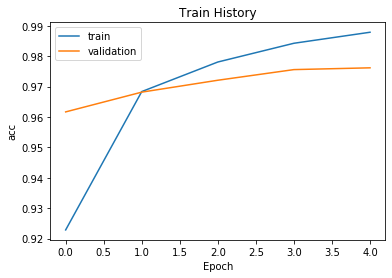

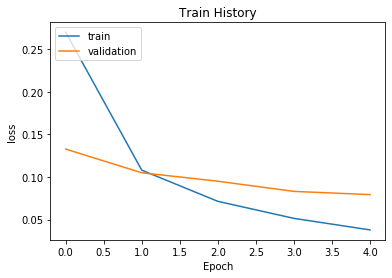

10000/10000 [==============================] - 0s 28us/step
accuracy= 0.9778


In [9]:
model = make_model(0)
evaluate_model(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 14s 289us/step - loss: 0.3159 - acc: 0.9035 - val_loss: 0.1356 - val_acc: 0.9597
Epoch 2/5
48000/48000 [==============================] - 12s 255us/step - l

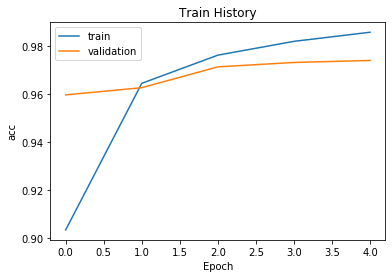

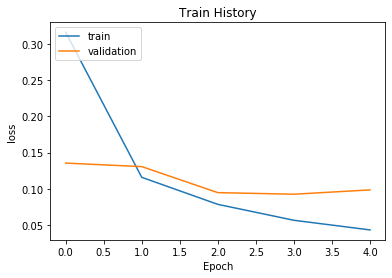

10000/10000 [==============================] - 0s 35us/step
accuracy= 0.9743


In [10]:
mode = make_model(2)
evaluate_model(mode)